<a href="https://colab.research.google.com/github/ithsirs/PRODIGY_ML_03/blob/main/cat_and_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task-03

Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.
Dataset:https://www.kaggle.com/datasets/tongpython/cat-and-dog

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import shutil
from PIL import Image
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from skimage.feature import hog
from sklearn.decomposition import PCA



# Copy the Dataset

In [2]:
dest_folder= r'/content/sample_data'
path = kagglehub.dataset_download("tongpython/cat-and-dog")

#create the destination folder if it doesn't exist
os.makedirs(dest_folder,exist_ok=True)

#moving the file to the destination folder
for item in os.listdir(path):
  s=os.path.join(path,item)
  d=os.path.join(dest_folder,item)
  if os.path.isdir(s):
    shutil.copytree(s,d, dirs_exist_ok=True)

  else:
    shutil.copy2(s,d)

print("Dataset copied to:", dest_folder)


Dataset copied to: /content/sample_data


#Resizing the images using hog features

In [ ]:
category=['cat', 'dog']

In [41]:
img_size=(128,128)

In [42]:

def img_resize_hog(datadir):
  labels=[]
  features=[]


  for label , category in enumerate(['cats', 'dogs']):
    folder=os.path.join(datadir, category)

    for filename in os.listdir(folder):
      img_path=os.path.join(folder,filename)

      try:
        #Check if the file is an image file before opening it
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
          img =Image.open(img_path).convert('L')
          img =img.resize(img_size)
          img_np=np.array(img)

          fv= hog(img_np, pixels_per_cell=(16,16), cells_per_block=(2,2), block_norm='L2-Hys')
          features.append(fv)
          labels.append(label)
        else:
          #Skip the file if it's not an image
          print(f"Skipping non-image file: {img_path}")
      except Exception as e:
        #Corrected the print statement to concatenate correctly
        print(f'failed to process {img_path}: {e}')


  return np.array(features), np.array(labels)

In [9]:
datapath="/content/sample_data/training_set/training_set"
print("image processing...")
X,y= img_resize_hog(datadir=datapath)
print("image processing completed")

image processing...
Skipping non-image file: /content/sample_data/training_set/training_set/cats/_DS_Store
Skipping non-image file: /content/sample_data/training_set/training_set/dogs/_DS_Store
image processing completed


In [43]:
X.shape , y.shape

((8005, 1764), (8005,))

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(6404, 1764)

# Applying PCA

In [13]:
pca= PCA(n_components=100)
X_train_pca= pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
X_train_pca.shape

(6404, 100)

# SVM Classifier

## Train the model

In [44]:
print("training SVM Classifier..")
model= SVC(C=2.0,kernel='rbf')
model.fit(X_train_pca, y_train)
print("training completed")

training SVM Classifier..
training completed


##  Predict using test set

In [45]:
y_pred= model.predict(X_test_pca)

print("\nClassification Report:\n")

print(classification_report(y_test, y_pred,target_names=['cats', 'dogs']))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

        cats       0.79      0.78      0.78       819
        dogs       0.77      0.78      0.77       782

    accuracy                           0.78      1601
   macro avg       0.78      0.78      0.78      1601
weighted avg       0.78      0.78      0.78      1601

Accuracy: 0.778263585259213


## Confusion Matrix

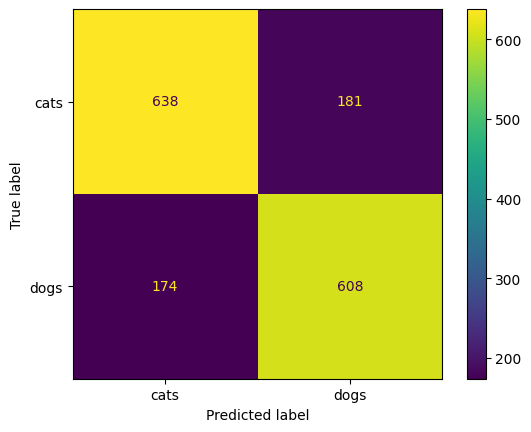

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

cm= confusion_matrix(y_test, y_pred)

display= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cats', 'dogs'])
display.plot()
plt.show()

In [38]:
def predict_img(imgpath):
  img =Image.open(imgpath).convert('L')
  img=img.resize(img_size)
  img_np= np.array(img)
  fv= hog(img_np, pixels_per_cell=(16,16), cells_per_block=(2,2), block_norm='L2-Hys')
  fv_pca= pca.transform([fv])

  prediction= model.predict(fv_pca)[0]

  label='Dog' if prediction ==1 else 'Cat'

  print(f"\n Predicted label :{label}")

  plt.imshow(img_np, cmap='gray')
  plt.title(label)

  plt.axis('off')
  plt.show()




 Predicted label :Cat


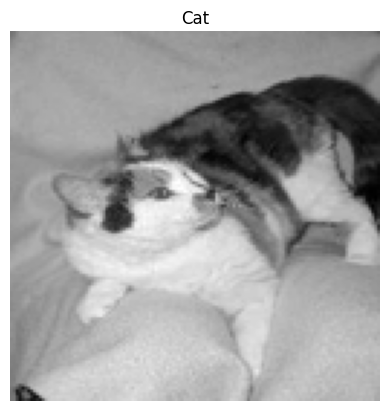

In [46]:
predict_img('/content/sample_data/test_set/test_set/cats/cat.4012.jpg')


 Predicted label :Dog


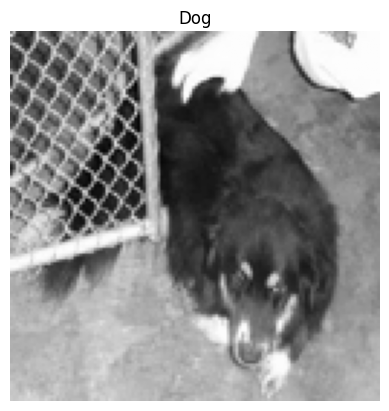

In [ ]:
predict_img('/content/sample_data/training_set/training_set/dogs/dog.1007.jpg')


 Predicted label :Cat


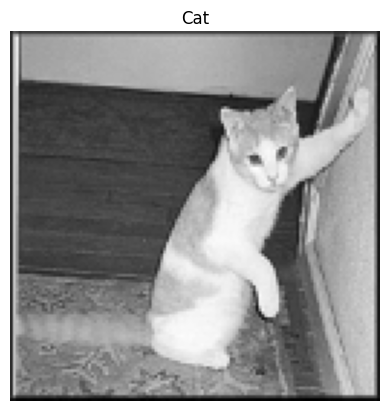

In [40]:
predict_img('/content/sample_data/test_set/test_set/cats/cat.4001.jpg')